In [1]:
import csv 
# java-0,javascrip-1,c#-2,php-3,android-4,jquery-5,c++-6,python-7,iphone-8,asp.net-9
def load_data(path):
    data_train = []
    label_train = []
    data_test = []
    label_test = []
    count=[0,0,0,0,0,0,0,0,0,0]
    with open(path) as in_file:
        reader = csv.DictReader(in_file)
        for row in reader:
            if 'java' in row['Tags']:
                if 'javascrip' not in row['Tags']:
                    if count[0] >1399   and count[0] < 2000:
                        data_test.append(row['Title'])
                        label_test.append(row['Tags'])
                        count[0] += 1
                    if count[0] < 1400:
                        data_train.append(row['Title'])
                        label_train.append(row['Tags'])
                        count[0] += 1
                else:
                    if count[1] > 1399 and count[1] < 2000:
                        data_test.append(row['Title'])
                        label_test.append(row['Tags'])
                        count[1] += 1
                    if count[1] < 1400:
                        data_train.append(row['Title'])
                        label_train.append(row['Tags'])
                        count[1] += 1
            elif 'c#' in row['Tags']:
                if count[2] > 1399 and count[2] < 2000:
                    data_test.append(row['Title'])
                    label_test.append(row['Tags'])
                    count[2] += 1
                if count[2] < 1400:
                    data_train.append(row['Title'])
                    label_train.append(row['Tags'])
                    count[2] += 1
            elif 'php' in row['Tags']:
                if count[3] > 1399 and count[3] < 2000:
                    data_test.append(row['Title'])
                    label_test.append(row['Tags'])
                    count[3] += 1
                if count[3] < 1400:
                    data_train.append(row['Title'])
                    label_train.append(row['Tags'])
                    count[3] += 1
            elif 'android' in row['Tags']:
                if count[4] > 1399 and count[4] < 2000:
                    data_test.append(row['Title'])
                    label_test.append(row['Tags'])
                    count[4] += 1
                if count[4] < 1400:
                    data_train.append(row['Title'])
                    label_train.append(row['Tags'])
                    count[4] += 1
            elif 'jquery' in row['Tags']:
                if count[5] > 1399 and count[5] < 2000:
                    data_test.append(row['Title'])
                    label_test.append(row['Tags'])
                    count[5] += 1
                if count[5] < 1400:
                    data_train.append(row['Title'])
                    label_train.append(row['Tags'])
                    count[5] += 1
            elif 'c++' in row['Tags']:
                if count[6] > 699 and count[6] < 1000:
                    data_test.append(row['Title'])
                    label_test.append(row['Tags'])
                    count[6] += 1
                if count[6] < 700:
                    data_train.append(row['Title'])
                    label_train.append(row['Tags'])
                    count[6] += 1
            elif 'python' in row['Tags']:
                if count[7] > 699 and count[7] < 1000:
                    data_test.append(row['Title'])
                    label_test.append(row['Tags'])
                    count[7] += 1
                if count[7] < 700:
                    data_train.append(row['Title'])
                    label_train.append(row['Tags'])
                    count[7] += 1
            elif 'iphone' in row['Tags']:
                if count[8] > 699 and count[8] < 1000:
                    data_test.append(row['Title'])
                    label_test.append(row['Tags'])
                    count[8] += 1
                if count[8] < 700:
                    data_train.append(row['Title'])
                    label_train.append(row['Tags'])
                    count[8] += 1
            elif 'asp.net' in row['Tags']:
                if count[9] > 699 and count[9] < 1000:
                    data_test.append(row['Title'])
                    label_test.append(row['Tags'])
                    count[9] += 1
                if count[9] < 700:
                    data_train.append(row['Title'])
                    label_train.append(row['Tags'])
                    count[9] += 1
    return data_train, label_train, data_test, label_test

(data_train, label_train, data_test, label_test) = load_data("Train_Title.csv")
print(len(data_train), len(label_train))
print(len(data_test),len(label_test))

11200 11200
4800 4800


In [2]:
def count_element(begin, end, token):
    k = 0
    for i in range(begin, end):
        if token in label_new_test[i]:
            k+= 1
    return k

def count_java(begin, end):
    k = 0
    for i in range(begin, end):
        if 'java' in label_new_test[i]:
            if 'javascrip' not in label_new_test[i]:
                k+= 1
    return k


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words="english", lowercase=True)
data_train_count = count_vect.fit_transform(data_train)
print(data_train_count.shape)

(11200, 7912)


In [4]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_tranformer = TfidfTransformer(norm='l2')
data_train_tfidf = tfidf_tranformer.fit_transform(data_train_count)
print(data_train_tfidf.shape)

(11200, 7912)


In [5]:
import numpy as np
data_test_counts = count_vect.transform(data_test)
data_test_tfidf = tfidf_tranformer.transform(data_test_counts)
print(data_test_tfidf.shape)

(4800, 7912)


In [20]:
from sklearn.svm import SVC
clf_SVC = SVC(C = 0.8,kernel='linear', decision_function_shape='ovr', random_state=400)
clf_SVC.fit(data_train_tfidf, label_train)
label_new_test = clf_SVC.predict(data_test_tfidf)
print(np.mean(label_new_test == label_test))

0.507708333333


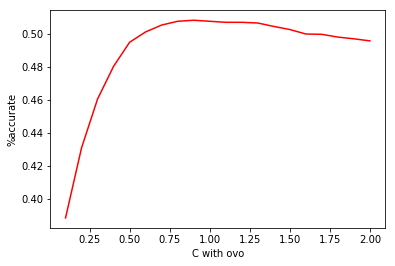

In [18]:
import matplotlib.pyplot as plt
def graph(data_X, data_Y, x_label, y_label):
    plt.plot(data_X, data_Y, 'r-')
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.show()  


def find_paramater_SVC_linear(C_, decision_function_shape_,random_state_):
    clf_SVC = SVC(C = C_,kernel='linear', decision_function_shape=decision_function_shape_, random_state=random_state_)
    clf_SVC.fit(data_train_tfidf, label_train)
    label_new_test = clf_SVC.predict(data_test_tfidf)
    return (np.mean(label_new_test == label_test))

C = []
loss_C = []
C_ = 0.1
for i in range(20):
    loss_C.append(find_paramater_SVC_linear(C_, 'ovo', 500))
    C.append(C_)
    C_ += 0.1

graph(C_ovo, loss_C_ovo, 'C with ovo' , '%accurate')



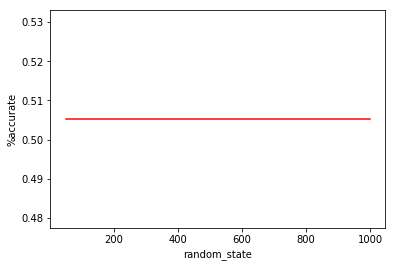

In [8]:
random_state=[]
loss_random_state=[]
random_state_ = 50
for i in range(20):
    loss_random_state.append(find_paramater_SVC_linear(0.75, 'ovo', random_state_))
    random_state.append(random_state_)
    random_state_ += 50
graph(random_state, loss_random_state, 'random_state' , '%accurate')